In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

In [3]:
ind = np.arange(100001,132736,1)
values = []
n=0
for i in ind:
    filename = 'O_P_1/log_' +str(i) + '.out'
    with open(filename) as f:
        l = f.readlines()
        ls = l[0].split()
        try:
            mse = float(ls[0])
        except:
            n +=1
        else:
            mse = float(ls[0])
            pape = float(ls[1])
            mbe = float(ls[2])
            past    = l[1].split()

            future  = l[2].split()
            values.append([i, mse, pape, mbe, past, future])

        
results = pd.DataFrame(data=values, columns = ['indeks', 'pape', 'mse', 'mbe', 'past', 'future'])
results = results.sort_values(by = 'mse', ascending = True)        
results.head()

indeks       pape       mse       mbe                  past  \
27272  127297  16.242396  0.017054  0.005401                  [[]]   
15373  115393  16.808680  0.017122  0.012175                  [[]]   
5653   105665  17.138684  0.017157  0.012760                  [[]]   
15886  115906  16.803868  0.017179  0.010445  [['wind_direction']]   
4629   104641  17.053080  0.017180  0.012585                  [[]]   

                                                  future  
27272  [['Clouds_pred',, 'Medium_clouds_pred',, 'clea...  
15373  [['Medium_clouds_pred',, 'High_clouds_pred',, ...  
5653   [['High_clouds_pred',, '24h_delay_h',, 'Wind_D...  
15886  [['Medium_clouds_pred',, 'High_clouds_pred',, ...  
4629   [['High_clouds_pred',, 'Wind_Direction_pred',,...

In [7]:
n

24

In [4]:
results = results.sort_values(by = 'mse', ascending = True)
results.head(10)
comb = []
with open('comb_P_1.txt') as f:
    doc = f.readlines()
    for i in results.indeks.iloc[:100]:
        comb.append(doc[i-100001].split())


In [5]:
comb_df = pd.DataFrame(data = comb, columns = ['indeks', 'past', 'future'])
comb_df.indeks = np.arange(100001,100101,1)
comb_df = comb_df.astype(int)

#np.savetxt('comb_P_2.txt', comb_df, fmt = '%d')


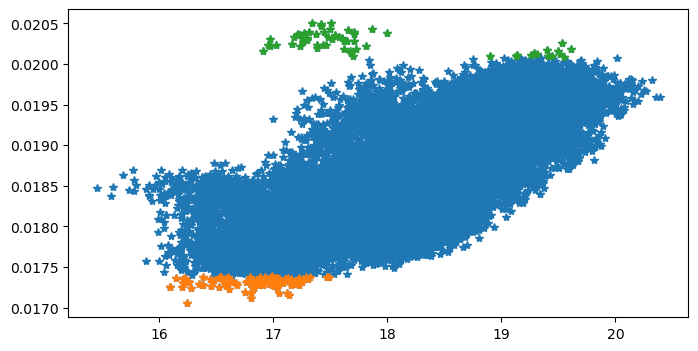

In [11]:
plt.figure(figsize =(8,4))
plt.plot(results.pape,results.mse,'*')
plt.plot(results.pape.iloc[:100], results.mse.iloc[:100],'*')
plt.plot(results.pape.iloc[-62:], results.mse.iloc[-62:],'*')

In [6]:
results = results.sort_values(by = 'mse', ascending = True)


In [4]:
ind = np.arange(100001,100100,1)
values = []
n=0

for i in ind:
    filename = 'O_P_2/log_' +str(i) + '.out'
    with open(filename) as f:
        l = f.readlines()
        ls = l[0].split()
        try:
            mse = float(ls[0])
        except:
            n +=1
        else:
            mse = []
            pape = []
            mbe = []
            for j in range(10):
                ls = l[j].split()
                mse.append(float(ls[0]))
                pape.append(float(ls[1]))
                mbe.append(float(ls[2]))
            past    = l[10].split()
            future  = l[11].split()
            values.append([i, mse, pape,mbe, past, future])

results2 = pd.DataFrame(data=values, columns = ['indeks', 'pape', 'mse','mbe', 'past', 'future'])
    

In [5]:
results2['pape_min'] = [min(row) for row in results2.pape ]
results2['pape_max'] = [max(row) for row in results2.pape ]
results2['pape_mean'] = [np.mean(row) for row in results2.pape ]
results2['mse_min'] = [min(row) for row in results2.mse ]
results2['mse_max'] = [max(row) for row in results2.mse ]
results2['mse_mean'] = [np.mean(row) for row in results2.mse ]
results2['mbe_min'] = [min(row) for row in results2.mbe ]
results2['mbe_max'] = [max(row) for row in results2.mbe ]
results2['mbe_mean'] = [np.mean(row) for row in results2.mbe ]
results2 = results2.sort_values(by = 'mse_mean', ascending = True)

results2

indeks                                               pape  \
6   100007  [16.984168851726935, 16.941433356822007, 16.72...   
32  100033  [16.99595797794611, 17.114994130982897, 17.166...   
30  100031  [17.111399821682433, 17.003503628213604, 17.07...   
77  100078  [17.064987092223657, 17.271873674437963, 16.98...   
19  100020  [16.96782506641978, 17.177827457250046, 17.007...   
..     ...                                                ...   
94  100095  [16.417160426268484, 16.439237814795504, 16.67...   
97  100098  [16.526602592506972, 16.834788740712185, 16.56...   
74  100075  [16.6014478313468, 16.434371625903466, 16.4165...   
93  100094  [16.800547885057153, 16.615164930285207, 16.69...   
69  100070  [17.140030143988763, 17.029452301513388, 16.99...   

                                                  mse  \
6   [0.01645571708883978, 0.016398032783881182, 0....   
32  [0.016171632068467952, 0.016380041815816333, 0...   
30  [0.016317160568779392, 0.016176952665705444, 0...   
77  [0.016321607329026034, 0.01633460012024897, 0....   
19  [0.016360662432717794, 0.016231177005683124, 0...   
..                                                ...   
94  [0.01643780763191987, 0.016525402130985273, 0....   
97  [0.016542507511048892, 0.016667217901709927, 0...   
74  [0.016717978161770047, 0.016421199767015685, 0...   
93  [0.0165701042837084, 0.01648735465206234, 0.01...   
69  [0.01668113094566114, 0.016650428275566537, 0....   

                                                  mbe  \
6   [0.01146577582118672, 0.012093029719384443, 0....   
32  [0.010954846066814183, 0.01117568120343481, 0....   
30  [0.011709860761271217, 0.0110797568433735, 0.0...   
77  [0.011111663167014181, 0.012158846703074187, 0...   
19  [0.011296663382178758, 0.011589726889777207, 0...   
..                                                ...   
94  [0.00939955871522625, 0.00938229070473614, 0.0...   
97  [0.006149778309156452, 0.007374703860533529, 0...   
74  [0.006811012008708142, 0.006010444116813209, 0...   
93  [0.010553709730383295, 0.009275738347132361, 0...   
69  [0.015337329097240365, 0.01469365464985761, 0....   

                                   past  \
6                                  [[]]   
32                                 [[]]   
30                                 [[]]   
77                                 [[]]   
19                                 [[]]   
..                                  ...   
94  [['wind_speed',, 'wind_direction']]   
97     [['ambient',, 'wind_direction']]   
74                                 [[]]   
93                     [['wind_speed']]   
69                     [['wind_speed']]   

                                               future   pape_min   pape_max  \
6   [['Medium_clouds_pred',, 'High_clouds_pred',, ...  16.723319  17.094191   
32  [['Medium_clouds_pred',, 'High_clouds_pred',, ...  16.960993  17.271376   
30  [['Medium_clouds_pred',, 'High_clouds_pred',, ...  16.923339  17.111400   
77  [['Medium_clouds_pred',, 'High_clouds_pred',, ...  16.986332  17.271874   
19  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...  16.862528  17.177827   
..                                                ...        ...        ...   
94  [['Medium_clouds_pred',, 'Pressure_pred',, 'Hu...  16.378040  16.679859   
97  [['Medium_clouds_pred',, 'High_clouds_pred',, ...  16.526603  16.834789   
74  [['Clouds_pred',, 'High_clouds_pred',, 'clear_...  16.416581  16.679096   
93  [['Clouds_pred',, 'Medium_clouds_pred',, '24h_...  16.615165  16.881134   
69  [['Clouds_pred',, 'Medium_clouds_pred',, 'High...  16.992242  17.290158   

    pape_mean   mse_min   mse_max  mse_mean   mbe_min   mbe_max  mbe_mean  
6   16.927851  0.016049  0.016463  0.016267  0.011213  0.012382  0.011811  
32  17.083864  0.016169  0.016380  0.016269  0.010955  0.012137  0.011480  
30  17.014661  0.016149  0.016419  0.016278  0.010383  0.011710  0.011235  
77  17.084407  0.016117  0.016354  0.016284  0.011112  0.012159  0.011631  
19  17.

In [18]:
for i in range(5):
    print(len(results2.future[i]))
    print(results2.future[i])

7
["['Clouds_pred',", "'Medium_clouds_pred',", "'clear_sky',", "'Wind_Direction_pred',", "'Pressure_pred',", "'Humidity_pred',", "'horizontal_pred']"]
6
["['Medium_clouds_pred',", "'High_clouds_pred',", "'clear_sky',", "'24h_delay_h',", "'Humidity_pred',", "'horizontal_pred']"]
5
["['High_clouds_pred',", "'24h_delay_h',", "'Wind_Direction_pred',", "'Humidity_pred',", "'horizontal_pred']"]
7
["['Medium_clouds_pred',", "'High_clouds_pred',", "'clear_sky',", "'24h_delay_h',", "'Wind_Direction_pred',", "'Humidity_pred',", "'horizontal_pred']"]
4
["['High_clouds_pred',", "'Wind_Direction_pred',", "'Humidity_pred',", "'horizontal_pred']"]


In [31]:
frame = pd.DataFrame(index=np.arange(10000),columns = ['ambient',  'wind_speed', 'module', 'wind_direction', 'Precipitation_pred'])

import re
for i, row in enumerate(zip(results.past.iloc[:10000])):
    row = str(row)
    for col in frame:
        if re.search(str(col), row):
            frame[col][i] = 1
frame.sum()
for i in range(5):
    print(len(results2.future[i]+len(results2.past[i]))

8
7
9
7
8


In [110]:
frame = pd.DataFrame(index=np.arange(10),columns = ['Temperature_pred', 'Humidity_pred', 'Clouds_pred',
       'Low_Clouds_pred', 'Medium_clouds_pred', 'High_clouds_pred',
       'Dewpoint_temperature_pred', 'Wind_speed_pred', 'hour', 'clear_sky', '24h_delay_h',
        'Wind_direction_pred'])

import re
for i, row in enumerate(zip(results.future.iloc[:10])):
    row = str(row)
    for col in frame:
        if re.search(str(col), row):
            frame[col][i] = 1
frame.sum()

Temperature_pred              0
Humidity_pred                10
Clouds_pred                  10
Low_Clouds_pred               8
Medium_clouds_pred            8
High_clouds_pred              0
Dewpoint_temperature_pred     1
Wind_speed_pred               0
hour                          0
clear_sky                     0
24h_delay_h                   0
Wind_direction_pred           0
dtype: object

<ErrorbarContainer object of 3 artists>

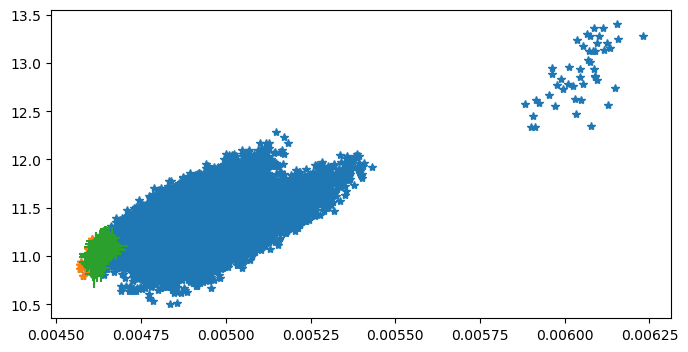

In [12]:
pape_error = [ results2.pape_mean - results2.pape_min,results2.pape_max - results2.pape_mean]
mse_error = [results2.mse_mean - results2.mse_min,results2.mse_max - results2.mse_mean]
plt.figure(figsize =(8,4))
plt.plot(results.mse,results.pape,'*')
plt.plot(results.mse.iloc[:20], results.pape.iloc[:20],'*')
plt.errorbar(results2.mse_mean,results2.pape_mean,yerr=pape_error,xerr=mse_error, fmt = 'o')


<ErrorbarContainer object of 3 artists>

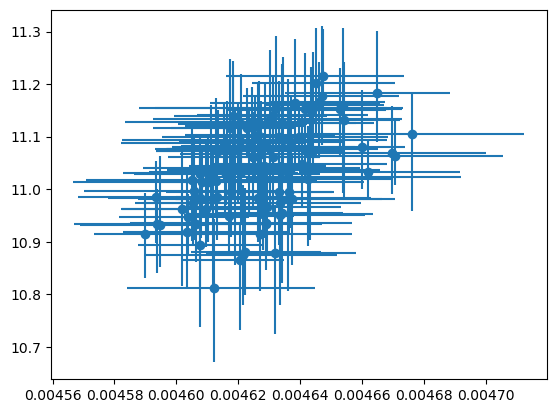

In [13]:

plt.errorbar(results2.mse_mean,results2.pape_mean,yerr=pape_error,xerr=mse_error, fmt = 'o')

In [15]:
print(results2.future.iloc[:10], results2.past.iloc[:10])

16    [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
25    [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
4     [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
8     [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
26    [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
7     [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
13    [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
11    [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
2     [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
6     [['Temperature_pred',, 'Clouds_pred',, 'Low_Cl...
Name: future, dtype: object 16               [['ambient',, 'wind_direction']]
25    [['ambient',, 'module',, 'wind_direction']]
4                [['ambient',, 'wind_direction']]
8                [['ambient',, 'wind_direction']]
26                                  [['ambient']]
7                            [['wind_direction']]
13                                  [['ambient']]
11    [['ambient',, 'module',, 'wind_direction']]
2           

In [2]:
ind = np.arange(100001,110080,1)
values = []
n=0
for i in ind:
    filename = 'O_P_3/log_' +str(i) + '.out'
    with open(filename) as f:
        l = f.readlines()
        ls = l[0]
        ls = ls.split()
        try:
            mse = float(ls[0])
        except:
            n +=1
        else:
            mse = float(ls[0])
            pape = float(ls[1])
            mbe = float(ls[2])
            past = l[1].split()
            future = l[2].split()
            hyper    = l[3].split()

            values.append([i, mse, pape,mbe, past, future, hyper])

        
results3 = pd.DataFrame(data=values, columns = ['indeks', 'pape', 'mse','mbe','past','futrure', 'hyperparam'])
results3 = results3.sort_values(by = 'mse', ascending = True)        


Text(0.5, 1.0, 'Grid search')

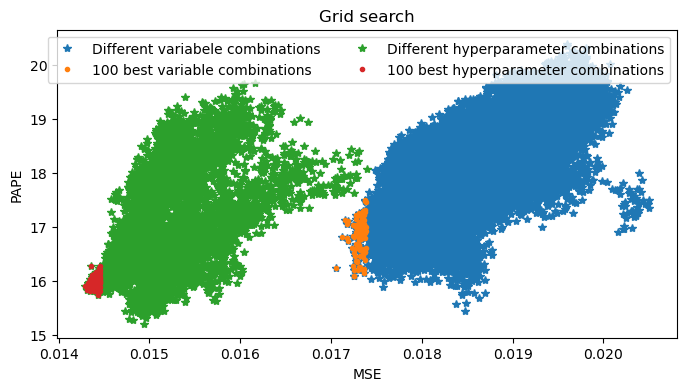

In [8]:
plt.figure(figsize =(8,4))
plt.plot(results.mse,results.pape,'*', label = 'Different variabele combinations')
plt.plot(results.mse.iloc[:100], results.pape.iloc[:100],'.', label = '100 best variable combinations')
plt.plot(results3.mse,results3.pape,'*', label = 'Different hyperparameter combinations')
plt.plot(results3.mse.iloc[:100], results3.pape.iloc[:100],'.', label= '100 best hyperparameter combinations')
plt.legend(ncols=2)
plt.xlabel('MSE')
plt.ylabel('PAPE')
plt.title('Grid search')

In [12]:
results3 = results3.sort_values(by = 'mse', ascending = True) 
results3.head(20)


indeks       pape       mse       mbe  past  \
4499  104500  15.907110  0.014293  0.005550  [[]]   
4699  104700  15.843904  0.014318  0.004134  [[]]   
5974  105975  15.956721  0.014323  0.006757  [[]]   
6174  106175  15.982066  0.014338  0.005737  [[]]   
9529  109530  15.870459  0.014340  0.004818  [[]]   
5754  105755  15.895031  0.014340  0.005385  [[]]   
5334  105335  15.965940  0.014344  0.005562  [[]]   
6589  106590  15.895465  0.014344  0.004723  [[]]   
5129  105130  15.976750  0.014347  0.006226  [[]]   
8489  108490  16.042279  0.014349  0.006610  [[]]   
5119  105120  15.815424  0.014349  0.004657  [[]]   
6169  106170  15.898657  0.014358  0.004747  [[]]   
4909  104910  15.911556  0.014361  0.004662  [[]]   
9959  109960  16.284674  0.014362  0.006678  [[]]   
6604  106605  15.952238  0.014364  0.006212  [[]]   
6799  106800  15.891249  0.014365  0.004841  [[]]   
8064  108065  15.985767  0.014365  0.005602  [[]]   
6809  106810  16.083806  0.014365  0.006670  [[]]   
9954  109955  16.006567  0.014366  0.005452  [[]]   
4924  104925  16.108683  0.014370  0.006403  [[]]   

                                                futrure  \
4499  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
4699  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
5974  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
6174  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
9529  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
5754  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
5334  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
6589  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
5129  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
8489  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
5119  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
6169  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
4909  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
9959  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
6604  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
6799  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
8064  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
6809  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
9954  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
4924  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   

                    hyperparam  
4499   [10000, 900, 48, 24, 4]  
4699  [10000, 1000, 48, 24, 2]  
5974  [12000, 1000, 48, 24, 5]  
6174  [12000, 1100, 48, 24, 3]  
9529   [18000, 900, 48, 24, 2]  
5754   [12000, 900, 48, 24, 3]  
5334  [11000, 1000, 48, 24, 3]  
6589  [13000, 1000, 48, 24, 2]  
5129   [11000, 900, 48, 24, 4]  
8489  [16000, 1000, 48, 24, 4]  
5119   [11000, 900, 48, 24, 2]  
6169  [12000, 1100, 48, 24, 2]  
4909  [10000, 1100, 48, 24, 2]  
9959  [18000, 1100, 48, 24, 4]  
6604  [13000, 1000, 48, 24, 5]  
6799  [13000, 1100, 48, 24, 2]  
8064  [15000, 1100, 48, 24, 3]  
6809  [13000, 1100, 48, 24, 4]  
9954  [18000, 1100, 48, 24, 3]  
4924  [10000, 1100, 48, 24, 5]

In [14]:
results3 = results3.sort_values(by = 'mse', ascending = True)

comb = []
with open('comb_P_3.txt') as f:
    doc = f.readlines()
    for i in results3.indeks.iloc[:100]:
        comb.append(doc[i-100001].split())

comb_df3 = pd.DataFrame(data = comb, columns = ['indeks', 'max_samples', 'n_estimators', 'lags', 'future', 'features', 'set'])
comb_df3.indeks = np.arange(100001,100101,1)
comb_df3 = comb_df3.astype(int)

np.savetxt('comb_P_4.txt', comb_df3, fmt = '%d')

results3.head(10), comb_df3[:100]

(      indeks       pape       mse       mbe  past  \
 4499  104500  15.907110  0.014293  0.005550  [[]]   
 4699  104700  15.843904  0.014318  0.004134  [[]]   
 5974  105975  15.956721  0.014323  0.006757  [[]]   
 6174  106175  15.982066  0.014338  0.005737  [[]]   
 9529  109530  15.870459  0.014340  0.004818  [[]]   
 5754  105755  15.895031  0.014340  0.005385  [[]]   
 5334  105335  15.965940  0.014344  0.005562  [[]]   
 6589  106590  15.895465  0.014344  0.004723  [[]]   
 5129  105130  15.976750  0.014347  0.006226  [[]]   
 8489  108490  16.042279  0.014349  0.006610  [[]]   
 
                                                 futrure  \
 4499  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
 4699  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
 5974  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
 6174  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
 9529  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
 5754  [['Medium_clouds_pred',, 'clear_sky',

In [15]:
ind = np.arange(100001,100101,1)
values = []
n=0
for i in ind:
    filename = 'O_P_4/log_' +str(i) + '.out'
    with open(filename) as f:
        l = f.readlines()
        ls = l[0].split()
        try:
            mse = float(ls[0])
        except:
            n +=1
        else:
            mse = []
            pape = []
            mbe = []
            for j in range(10):
                ls = l[j].split()
                mse.append(float(ls[0]))
                pape.append(float(ls[1]))
                mbe.append(float(ls[2]))
            future       = l[11].split()
            hyperparam   = l[12].split()
            values.append([i, mse, pape, mbe, future, hyperparam])

results4 = pd.DataFrame(data=values, columns = ['indeks', 'pape', 'mse','mbe','future', 'hyperparam'])
    

In [16]:
results4['pape_min'] = [min(row) for row in results4.pape ]
results4['pape_max'] = [max(row) for row in results4.pape ]
results4['pape_mean'] = [np.mean(row) for row in results4.pape ]
results4['mse_min'] = [min(row) for row in results4.mse ]
results4['mse_max'] = [max(row) for row in results4.mse ]
results4['mse_mean'] = [np.mean(row) for row in results4.mse ]
results4 = results4.sort_values(by = 'mse_mean', ascending = True)
results4

indeks                                               pape  \
58  100059  [15.76566462489081, 15.802981274940919, 15.715...   
27  100028  [16.009732095259363, 16.07155418084147, 15.894...   
22  100023  [15.936601677269385, 16.105636261950334, 16.25...   
1   100002  [15.894725154876584, 15.838709139983463, 15.89...   
69  100070  [16.06937302883427, 16.00841143873421, 16.1431...   
..     ...                                                ...   
80  100081  [15.90504960613804, 15.849985794380657, 15.898...   
38  100039  [16.08232586697114, 16.155511238419944, 16.077...   
82  100083  [15.793567282277854, 15.799602306491048, 15.88...   
60  100061  [16.19417344031613, 16.229158570208746, 16.157...   
99  100100  [16.237283870676947, 16.089275943413703, 16.21...   

                                                  mse  \
58  [0.014281907077832034, 0.01446218398223081, 0....   
27  [0.014367613716387546, 0.014380199421246907, 0...   
22  [0.014264305679961573, 0.01444763123973895, 0....   
1   [0.014372013416732539, 0.014350481599593698, 0...   
69  [0.014385739915349903, 0.014282396400748189, 0...   
..                                                ...   
80  [0.014512157726128502, 0.014425042031873524, 0...   
38  [0.014562652875806216, 0.014402475540173055, 0...   
82  [0.0145320577248912, 0.014467083107349713, 0.0...   
60  [0.014459110711991166, 0.014575737913434037, 0...   
99  [0.014686388128625601, 0.014647942350929305, 0...   

                                                  mbe  \
58  [0.003969318718317538, 0.003687464650412662, 0...   
27  [0.005492995590610719, 0.005659287319355545, 0...   
22  [0.005981849853545993, 0.006204775058445318, 0...   
1   [0.004041853694070909, 0.004496207473156728, 0...   
69  [0.0054035629021932825, 0.005208656175675571, ...   
..                                                ...   
80  [0.0036996745953571278, 0.0036397622565695147,...   
38  [0.007284005253283659, 0.007811526844388207, 0...   
82  [0.0032598907849275527, 0.0038092661307123276,...   
60  [0.006903286922103094, 0.007686491811919701, 0...   
99  [0.0072366767790771605, 0.007096789614282574, ...   

                                               future  \
58  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
27  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
22  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
1   [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
69  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
..                                                ...   
80  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
38  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
82  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
60  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   
99  [['Medium_clouds_pred',, 'clear_sky',, '24h_de...   

                     hyperparam   pape_min   pape_max  pape_mean   mse_min  \
58   [10000, 900, 48, 24, 2, 4]  15.715902  16.053742  15.878393  0.014282   
27  [10000, 1000, 48, 24, 3, 4]  15.894062  16.071554  15.976955  0.014313   
22  [10000, 1100, 48, 24, 4, 4]  15.936602  16.250377  16.084634  0.014264   
1   [10000, 1000, 48, 24, 2, 4]  15.826148  15.963810  15.884030  0.014319   
69   [10000, 900, 48, 24, 3, 4]  15.866579  16.143141  15.997733  0.014269   
..                          ...        ...        ...        ...       ...   
80  [17000, 1000, 48, 24, 1, 4]  15.733217  15.992062  15.876997  0.014425   
38   [11000, 900, 48, 24, 7, 4]  16.014820  16.201943  16.130518  0.014402   
82  [16000, 1000, 48, 24, 1, 4]  15.699279  15.995384  15.878244  0.014410   
60   [11000, 900, 48, 24, 6, 4]  16.036815  16.259922  16.160661  0.014378   
99  [13000, 1100, 72, 24, 6, 4]  16.089276  16.413749  16.268998  0.014550   

     mse_max  mse_mean  
58  0.014462  0.014379  
27  0.014416  0.014381  
22  0.014448  0.014383  
1   0.014487  0.014386  
69  0.014469  0.014389  
..       ...       ...  
80  0.014604  0.014504  
38  0.014713  0.014506  
82  0.

<ErrorbarContainer object of 3 artists>

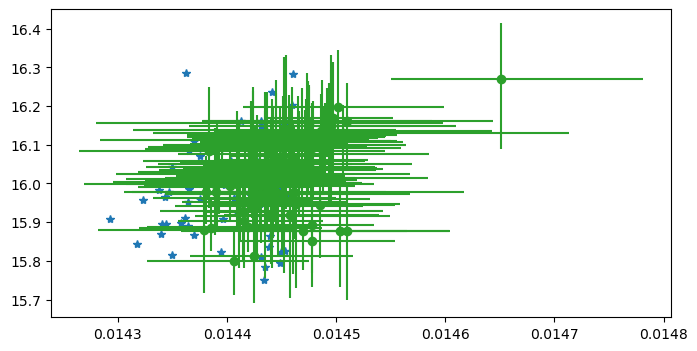

In [17]:
pape_error = [ results4.pape_mean - results4.pape_min,results4.pape_max - results4.pape_mean]
mse_error = [results4.mse_mean - results4.mse_min,results4.mse_max - results4.mse_mean]
plt.figure(figsize =(8,4))
#plt.errorbar(results4.mse_mean,results4.pape_mean,yerr=pape_error,xerr=mse_error, fmt = 'o')
plt.plot(results3.mse.iloc[:100], results3.pape.iloc[:100],'*')
plt.plot(results4.mse_mean.iloc[:100], results4.pape_mean.iloc[:100],'*')
plt.errorbar(results4.mse_mean,results4.pape_mean,yerr=pape_error,xerr=mse_error, fmt = 'o')


In [18]:
results4.future[0]

["['Medium_clouds_pred',",
 "'clear_sky',",
 "'24h_delay_h',",
 "'Wind_Direction_pred',",
 "'Humidity_pred',",
 "'horizontal_pred']"]